In [1]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nPerClust = 100
blur = 1

A = [ 1,1 ]
B = [ 5,1 ]

a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

In [3]:
a ,b

([array([ 0.19997956,  1.03585266,  3.14493043,  0.84167126,  3.16282626,
          1.87626753,  1.4747983 , -0.09007618,  1.84187154,  1.88315326,
          2.63175534,  0.70365465,  3.2750728 ,  2.39468304,  0.82777141,
          1.4634654 ,  0.4727108 ,  2.3815148 ,  2.71217514,  1.09100066,
          1.48106208,  1.28020938,  1.47355736,  1.62495294,  1.096869  ,
          1.06240158,  0.71758034,  0.28896161,  1.69049076,  2.71127136,
          4.03538269,  2.070392  ,  0.12694832,  0.1766332 , -0.33819557,
          0.31861755,  1.44902634,  0.61374644,  1.22390647,  3.05349086,
          0.85992451,  0.4087025 , -1.5643497 ,  1.22209489,  0.41023463,
          0.34632374,  0.32681309,  1.48684719, -0.29678829,  1.08877186,
         -0.449089  ,  0.77340612,  3.55709668,  2.96549134,  1.26562732,
          0.13861705,  0.84985918,  2.76889044,  1.49817432,  2.59514765,
          0.48827839,  2.06111054, -0.69815033,  1.07602188,  0.81686427,
          1.78548825,  1.72987574,  1.

In [4]:
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T



In [5]:
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

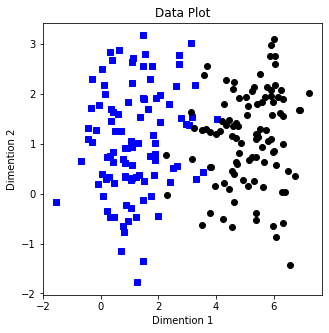

In [6]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('Data Plot')
plt.xlabel('Dimention 1')
plt.ylabel('Dimention 2')
plt.show();

In [7]:
ANNclassify = nn.Sequential(nn.Linear(2,1),
                            #nn.ReLU(),
                            nn.Linear(1,1),
                            nn.Sigmoid())
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Linear(in_features=1, out_features=1, bias=True)
  (2): Sigmoid()
)

In [8]:
learningrate=0.01

lossfun = nn.BCELoss()
optimizer=torch.optim.SGD(ANNclassify.parameters(),learningrate)

In [9]:
numepochs = 1000

losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    
    yHat = ANNclassify(data)
    
    loss=lossfun(yHat,labels)
    losses[epochi]=loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

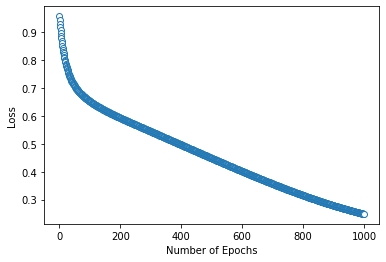

In [10]:
plt.plot(losses.detach(),'o',markerfacecolor='w')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show();

In [11]:
predictions=ANNclassify(data)

predlabels = predictions>0.5

missclassified = np.where(predlabels != labels)[0]

totalacc = 100-100*len(missclassified)/(2*nPerClust)

print('Final Accuracy: %g%%' %totalacc)

Final Accuracy: 92.5%


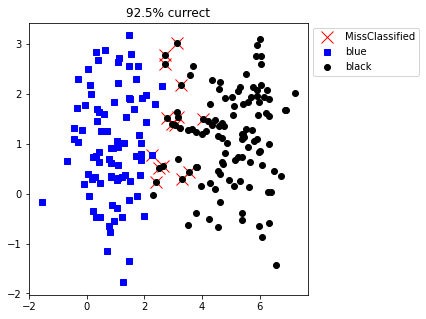

In [12]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[missclassified,0],data[missclassified,1],'rx',markersize=12)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')

plt.legend(['MissClassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% currect')
plt.show()